In [ ]:
#pip install ruamel-yaml
!pip install nltk textstat
!pip install PyPDF2
!pip install pycryptodome
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install ipywidgets
!pip install matplotlib
!pip install textblob

In [1]:
#calling the necessary library
import os
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from PyPDF2 import PdfReader
import textstat
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import clear_output, display
import ipywidgets as widgets
import string
from tkinter import Tk, filedialog
from nltk.stem import WordNetLemmatizer
import re

# Import additional libraries for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from textblob import TextBlob


In [2]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Code to select file

In [3]:
file_paths = [] 

def select_files(b):
    global file_paths
    root = Tk()
    root.withdraw()  
    file_paths = filedialog.askopenfilenames()  
    print(file_paths) 

fileselect = widgets.Button(description="Select Files")
fileselect.on_click(select_files)

display(fileselect)

print("Please select the PDF files you wish to process.")

Button(description='Select Files', style=ButtonStyle())

Please select the PDF files you wish to process.
('C:/Users/User/OneDrive/Documents/Along/Master/STQD6889 Capstone Project/Data/AGIC - Motor Insurance – Comprehensive Cover.pdf', 'C:/Users/User/OneDrive/Documents/Along/Master/STQD6889 Capstone Project/Data/AGIC - Motor Insurance – Third Party Cover.pdf', 'C:/Users/User/OneDrive/Documents/Along/Master/STQD6889 Capstone Project/Data/AGIC - Motor Insurance – Third Party, Fire And Theft Cover.pdf', 'C:/Users/User/OneDrive/Documents/Along/Master/STQD6889 Capstone Project/Data/AGIC - Motorcycle Plus.pdf', 'C:/Users/User/OneDrive/Documents/Along/Master/STQD6889 Capstone Project/Data/AIAGB - Commercial-Vehicle.pdf', 'C:/Users/User/OneDrive/Documents/Along/Master/STQD6889 Capstone Project/Data/AIAGB - Family_Drive_PDS.pdf', 'C:/Users/User/OneDrive/Documents/Along/Master/STQD6889 Capstone Project/Data/AIAGB - Private-Car-PDS.pdf', 'C:/Users/User/OneDrive/Documents/Along/Master/STQD6889 Capstone Project/Data/AIG - Passenger Protection Plan - Prod

 # Coding to apply Readability Formula and Clustering

In [9]:
# Function to extract text from a PDF file given a path
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as f:
        pdf = PdfReader(f)
        text = ""
        for page in pdf.pages:
            text += page.extract_text() or ""  # Ensure we concatenate strings
        return text

# Function to calculate averages of the scores
def calculate_averages(df):
    return df.mean()


# Process the selected files
def process_files(file_paths, n_clusters=3):
    clear_output(wait=True)
    results = []
    for file_path in file_paths:
        # Only process .pdf files
        if file_path.endswith('.pdf'):
            # Read the file content and extract text
            text = extract_text_from_pdf(file_path)

            # Tokenize the text into sentences and words
            sentences = sent_tokenize(text)
            words = word_tokenize(text)

            # Calculate readability scores
            fk_grade_level = textstat.flesch_kincaid_grade(text)
            gunning_fog = textstat.gunning_fog(text)
            flesch_reading_ease = textstat.flesch_reading_ease(text)
            smog_index = textstat.smog_index(text)


            # Perform sentiment analysis
            blob = TextBlob(text)
            polarity, subjectivity = blob.sentiment.polarity, blob.sentiment.subjectivity
            
            # Append results for the current file
            results.append({
                'File': os.path.basename(file_path),
                'Flesch-Kincaid Grade Level': fk_grade_level,
                'Gunning Fog Index': gunning_fog,
                'Flesch Reading Ease': flesch_reading_ease,
                'SMOG Index': smog_index,
            })
    
    # Convert the results to a DataFrame and display it
    df = pd.DataFrame(results)
    
    # Calculate averages
    averages = calculate_averages(df.iloc[:, 1:])
    
    # Perform clustering
    features = df.iloc[:, 1:-2]  # Exclude ASL and ASW from clustering features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    df['Cluster'] = kmeans.labels_
    
    # Set pandas options to display all rows
    pd.set_option('display.max_rows', None)
    # Display the DataFrame
    display(df)
    
    # Save the DataFrame with cluster labels
    global clustered_data
    clustered_data = df.copy()

    # Display averages
    print("Average Scores:")
    display(averages)
    
    
# Add a button to trigger file processing after selection
process_button = widgets.Button(description="Process Files")
process_button.on_click(lambda b: process_files(file_paths))
display(process_button)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,File,Flesch-Kincaid Grade Level,Gunning Fog Index,Flesch Reading Ease,SMOG Index,Cluster
0,AGIC - Motor Insurance – Comprehensive Cover.pdf,13.3,12.73,45.39,14.6,1
1,AGIC - Motor Insurance – Third Party Cover.pdf,12.9,12.19,46.51,14.4,0
2,"AGIC - Motor Insurance – Third Party, Fire And...",11.6,12.00,55.27,14.1,0
3,AGIC - Motorcycle Plus.pdf,14.3,13.51,42.85,15.7,1
4,AIAGB - Commercial-Vehicle.pdf,11.8,11.08,49.45,14.0,0
5,AIAGB - Family_Drive_PDS.pdf,13.6,11.98,39.37,15.2,0
6,AIAGB - Private-Car-PDS.pdf,12.5,11.73,47.62,14.4,0
7,AIG - Passenger Protection Plan - Product Disc...,9.5,10.22,60.75,12.9,2
8,AIG - Private Car Insurance.pdf,12.1,11.33,48.54,14.0,0
9,BSIB - Auto Plus PDS_EN_UW042023.pdf,9.2,8.56,56.15,12.2,2


Average Scores:


Flesch-Kincaid Grade Level    11.567059
Gunning Fog Index             11.209647
Flesch Reading Ease           50.508824
SMOG Index                    13.927059
dtype: float64

 # Coding for statistical summary

Button(description='Analyze Data', style=ButtonStyle())

,count,mean,std,min,25%,50%,75%,max
Flesch-Kincaid Grade Level,85.0,11.567059,1.553520,8.90,10.40,11.60,12.70,17.10
Gunning Fog Index,85.0,11.209647,1.401017,8.56,10.14,11.14,12.06,15.69
Flesch Reading Ease,85.0,50.508824,5.936190,34.97,47.62,50.50,53.10,63.83
SMOG Index,85.0,13.927059,1.013056,11.90,13.20,14.00,14.60,17.50
Cluster,85.0,1.058824,0.930347,0.00,0.00,1.00,2.00,2.00


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

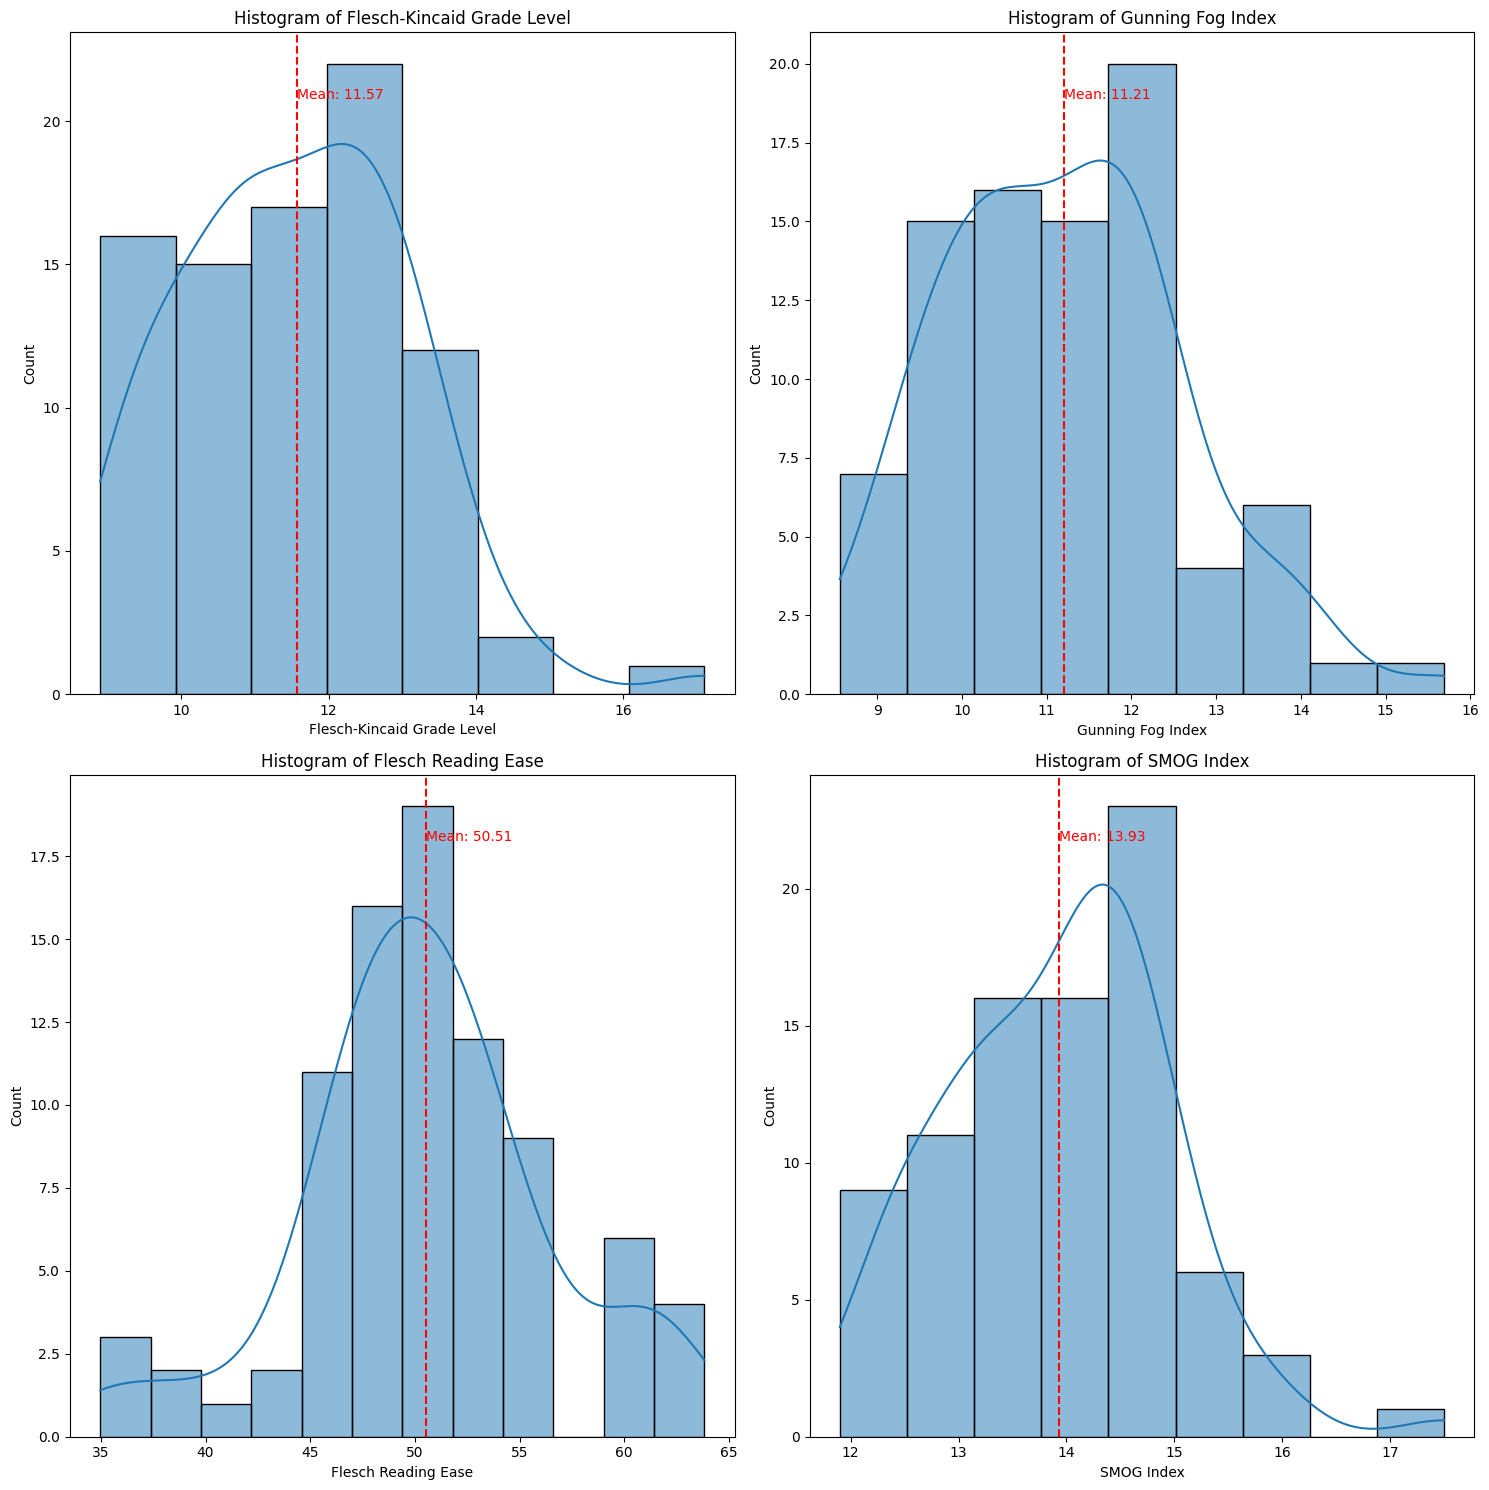

In [6]:
# Function to display statistical summary
def display_statistical_summary(df):
    summary = df.describe().transpose()
    display(summary)

# Function to plot histograms for readability scores with mean labels
def plot_histograms(df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    axes = axes.flatten()

    # Exclude 'File', 'Cluster', and 'Dale-Chall Score' columns
    metrics_to_plot = [
        'Flesch-Kincaid Grade Level',
        'Gunning Fog Index',
        'Flesch Reading Ease',
        'SMOG Index'
    ]
    
    for idx, col in enumerate(metrics_to_plot):
        sns.histplot(df[col], ax=axes[idx], kde=True)
        mean_val = df[col].mean()
        axes[idx].axvline(mean_val, color='r', linestyle='--')
        axes[idx].text(mean_val, axes[idx].get_ylim()[1] * 0.9, f'Mean: {mean_val:.2f}', color='r')
        axes[idx].set_title(f'Histogram of {col}')
    
    plt.tight_layout()
    plt.show()

# Example usage (make sure df is loaded)
# Assume df is the DataFrame created from the process_files function

# Load your DataFrame (clustered_data) and use it for analysis
def load_and_analyze():
    global clustered_data  # Assuming clustered_data is the DataFrame from the previous part
    df = clustered_data.copy()  # Make sure this DataFrame is already created

    # Display statistical summary
    display_statistical_summary(df.iloc[:, 1:])
    
    # Plot histograms
    plot_histograms(df)

# Button to trigger analysis
analyze_button = widgets.Button(description="Analyze Data")
analyze_button.on_click(lambda b: load_and_analyze())
display(analyze_button)


 # Coding to check number of documents in each cluster

In [7]:
# Function to calculate and display the number of documents in each cluster
def calculate_and_display_cluster_counts():
    if 'clustered_data' in globals():
        cluster_counts = clustered_data['Cluster'].value_counts().sort_index()
        print("Number of documents in each cluster:")
        print(cluster_counts)
    else:
        print("Data not found. Please run the data processing cell first.")

# Add a button to trigger cluster count calculation
cluster_count_button = widgets.Button(description="Calculate Cluster Counts")
cluster_count_button.on_click(lambda b: calculate_and_display_cluster_counts())
display(cluster_count_button)

Button(description='Calculate Cluster Counts', style=ButtonStyle())

Number of documents in each cluster:
Cluster
0    34
1    12
2    39
Name: count, dtype: int64


 # Coding to visualise Box-Plot by each Cluster

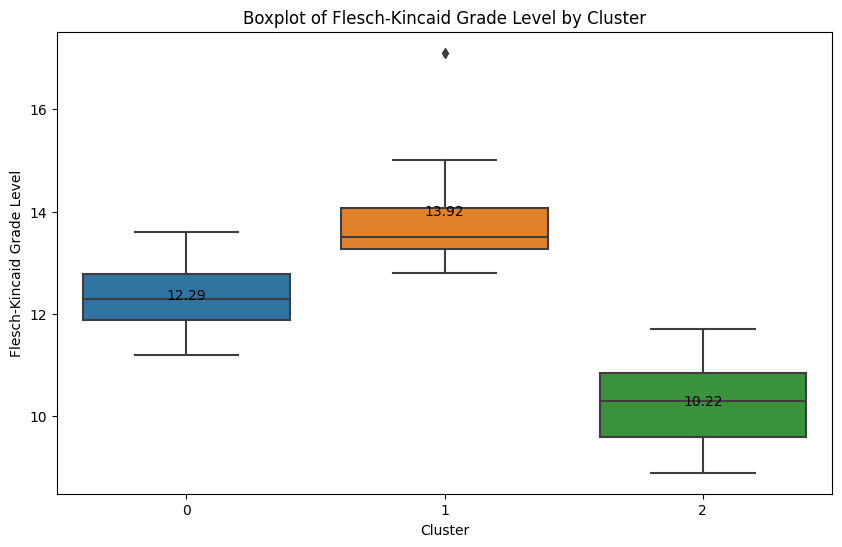

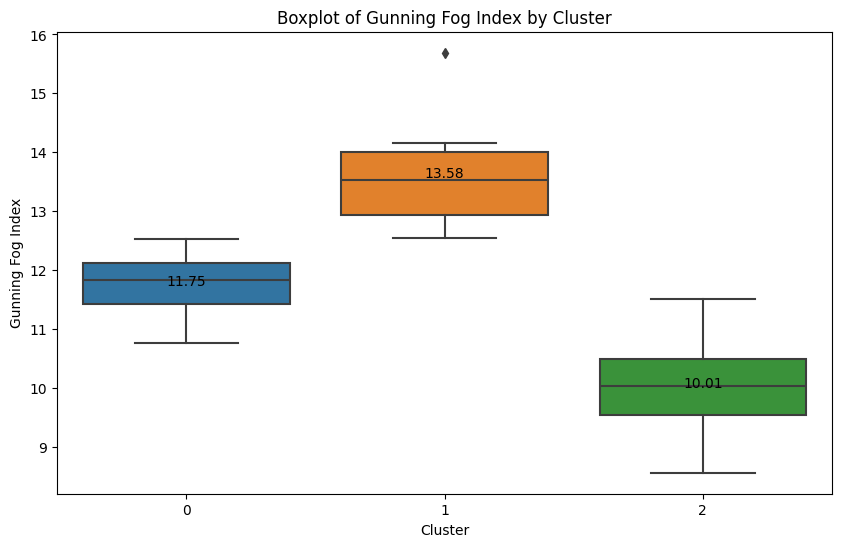

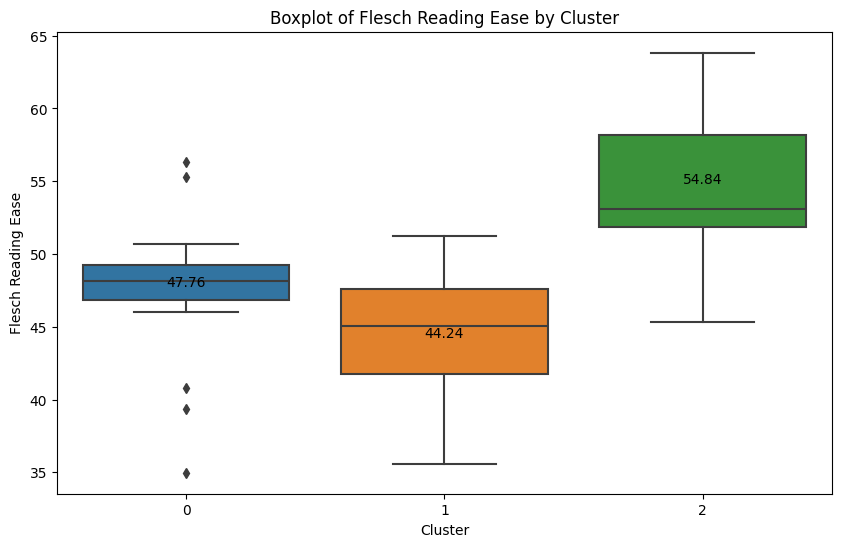

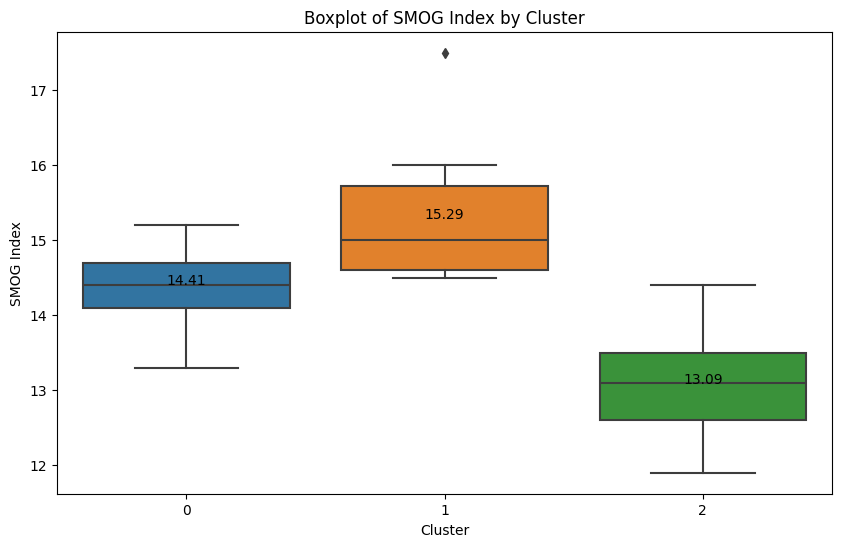

In [10]:
# Make sure this cell is run after the data processing cell
def generate_boxplots(output_dir='output_plots'):
    if 'clustered_data' in globals():
        scores = ['Flesch-Kincaid Grade Level', 'Gunning Fog Index', 'Flesch Reading Ease', 'SMOG Index']
        for score in scores:
            plt.figure(figsize=(10, 6))
            ax = sns.boxplot(x='Cluster', y=score, data=clustered_data)
            plt.title(f'Boxplot of {score} by Cluster')

            # Calculate means and add them as text annotations
            means = clustered_data.groupby('Cluster')[score].mean()
            for index, mean in enumerate(means):
                ax.text(index, mean, f'{mean:.2f}', color='black', ha="center")

            # Check if output directory exists, if not, create it
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)

            # Save the figure before showing it
            plt.savefig(f"{output_dir}/{score.replace(' ', '_')}_Boxplot.png")

            # Show the plot
            plt.show()
    else:
        print("Data not found. Please run the data processing cell first.")

# Call the function to generate and save boxplots
generate_boxplots()

 # Coding for summary statistics by cluster

In [12]:
import pandas as pd
import numpy as np

# Function to detect outliers using IQR method
def detect_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return ((data < lower_bound) | (data > upper_bound)).sum()

# Function to generate and display enhanced summary statistics for each cluster
def generate_and_display_summary_statistics():
    if 'clustered_data' in globals():
        summary_statistics = clustered_data.groupby('Cluster').agg({
            'Flesch-Kincaid Grade Level': ['mean', 'median', 'std', 'min', 'max', detect_outliers],
            'Gunning Fog Index': ['mean', 'median', 'std', 'min', 'max', detect_outliers],
            'Flesch Reading Ease': ['mean', 'median', 'std', 'min', 'max', detect_outliers],
            'SMOG Index': ['mean', 'median', 'std', 'min', 'max', detect_outliers]
        }).reset_index()

        # Flatten the MultiIndex columns
        summary_statistics.columns = [' '.join(col).strip() for col in summary_statistics.columns.values]
        
        # Rename the outliers column for clarity
        summary_statistics = summary_statistics.rename(columns={
            'Flesch-Kincaid Grade Level detect_outliers': 'Flesch-Kincaid Grade Level Outliers',
            'Gunning Fog Index detect_outliers': 'Gunning Fog Index Outliers',
            'Flesch Reading Ease detect_outliers': 'Flesch Reading Ease Outliers',
            'SMOG Index detect_outliers': 'SMOG Index Outliers'
        })

        # Display the summary statistics
        display(summary_statistics)
    else:
        print("Data not found. Please run the data processing cell first.")

# Call the function to generate and display summary statistics
generate_and_display_summary_statistics()


,Cluster,Flesch-Kincaid Grade Level mean,Flesch-Kincaid Grade Level median,Flesch-Kincaid Grade Level std,Flesch-Kincaid Grade Level min,Flesch-Kincaid Grade Level max,Flesch-Kincaid Grade Level Outliers,Gunning Fog Index mean,Gunning Fog Index median,Gunning Fog Index std,...,Flesch Reading Ease std,Flesch Reading Ease min,Flesch Reading Ease max,Flesch Reading Ease Outliers,SMOG Index mean,SMOG Index median,SMOG Index std,SMOG Index min,SMOG Index max,SMOG Index Outliers
0,0,12.288235,12.3,0.580368,11.2,13.6,0,11.747059,11.84,0.456373,...,3.735063,34.97,56.29,5,14.405882,14.4,0.434107,13.3,15.2,0
1,1,13.916667,13.5,1.168397,12.8,17.1,1,13.579167,13.53,0.866209,...,5.433023,35.54,51.21,0,15.291667,15.0,0.869125,14.5,17.5,1
2,2,10.215385,10.3,0.750627,8.9,11.7,0,10.012051,10.04,0.661387,...,4.341417,45.35,63.83,0,13.089744,13.1,0.611209,11.9,14.4,0


In [ ]:
!pip install xgboost
!pip install mlxtend

In [13]:
import xgboost as xgb
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

 # Coding for classification

In [14]:

# Define the target and feature columns
target = 'Cluster'
features = clustered_data.drop(columns=[target, 'File'])  # Exclude 'File' and 'Cluster' columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, clustered_data[target], test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Train a Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Train a K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Train an XGBoost Classifier
xgboost = xgb.XGBClassifier(random_state=42)
xgboost.fit(X_train, y_train)

# Predict and evaluate the Decision Tree Classifier
y_pred_tree = decision_tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_report = classification_report(y_test, y_pred_tree)

# Predict and evaluate the Random Forest Classifier
y_pred_forest = random_forest.predict(X_test)
forest_accuracy = accuracy_score(y_test, y_pred_forest)
forest_report = classification_report(y_test, y_pred_forest)

# Predict and evaluate the K-Nearest Neighbors Classifier
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)

# Predict and evaluate the XGBoost Classifier
y_pred_xgb = xgboost.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)


# Display the results
print("Decision Tree Classifier Accuracy:", tree_accuracy)
print("Decision Tree Classification Report:")
print(tree_report)

print("\nRandom Forest Classifier Accuracy:", forest_accuracy)
print("Random Forest Classification Report:")
print(forest_report)

print("K-Nearest Neighbors Classifier Accuracy:", knn_accuracy)
print("K-Nearest Neighbors Classification Report:")
print(knn_report)

print("\nXGBoost Classifier Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:")
print(xgb_report)


#paper support kenapa kita pilih random forest (bagging), decision tree, KNN - traditional method
#try XGBoost (boosting), stack generalisation machine learning (combination) - ensemble method
#paper support accuracy, precision, recall, f1-score
#cari features importance among dalam score/characteristic, random forest & decision tree almost the same. tapi KNN lain


Decision Tree Classifier Accuracy: 0.8823529411764706
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         7

    accuracy                           0.88        17
   macro avg       0.90      0.87      0.86        17
weighted avg       0.92      0.88      0.88        17


Random Forest Classifier Accuracy: 0.8823529411764706
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         7

    accuracy                           0.88        17
   macro avg       0.90      0.87      0.86        17
weighted avg       0.92      0.88      0.88        17

K-Nearest Neighbors Classifier Accuracy: 0.705882352941

 # Coding to check on feature importance

In [15]:
import pandas as pd
from sklearn.inspection import permutation_importance

# Random Forest Feature Importance
rf_importances = random_forest.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': rf_importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)
print("Random Forest Feature Importances:")
print(rf_importance_df)

# Decision Tree Feature Importance
dt_importances = decision_tree.feature_importances_
dt_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': dt_importances})
dt_importance_df = dt_importance_df.sort_values(by='Importance', ascending=False)
print("\nDecision Tree Feature Importances:")
print(dt_importance_df)

# K-Nearest Neighbors Feature Importance using Permutation Importance
knn_importance_result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
knn_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': knn_importance_result.importances_mean})
knn_importance_df = knn_importance_df.sort_values(by='Importance', ascending=False)
print("\nK-Nearest Neighbors Feature Importances:")
print(knn_importance_df)

# XGBoost Feature Importance
xgb_importances = xgboost.feature_importances_
xgb_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': xgb_importances})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)
print("\nXGBoost Feature Importances:")
print(xgb_importance_df)


Random Forest Feature Importances:
                      Feature  Importance
0  Flesch-Kincaid Grade Level    0.420527
1           Gunning Fog Index    0.366987
2         Flesch Reading Ease    0.107534
3                  SMOG Index    0.104952

Decision Tree Feature Importances:
                      Feature  Importance
0  Flesch-Kincaid Grade Level    0.636823
1           Gunning Fog Index    0.363177
2         Flesch Reading Ease    0.000000
3                  SMOG Index    0.000000

K-Nearest Neighbors Feature Importances:
                      Feature  Importance
2         Flesch Reading Ease    0.200000
1           Gunning Fog Index    0.070588
0  Flesch-Kincaid Grade Level    0.011765
3                  SMOG Index    0.000000

XGBoost Feature Importances:
                      Feature  Importance
0  Flesch-Kincaid Grade Level    0.685612
1           Gunning Fog Index    0.231856
2         Flesch Reading Ease    0.080995
3                  SMOG Index    0.001536


 # Coding to check optimum number for KNN

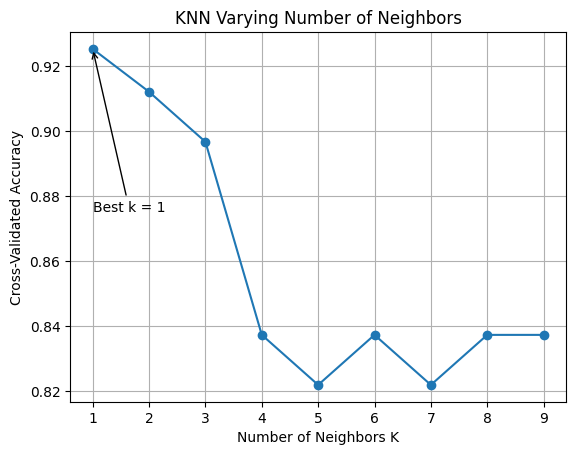

'C:/Users/User/OneDrive/Documents/Along/Master/STQD6889 Capstone Project/Part 2/knn_varying_neighbors.png'

In [17]:
plt.plot(n_neighbors, cv_scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Varying Number of Neighbors')
plt.annotate(f'Best k = {best_k}', xy=(best_k, max(cv_scores)), xytext=(best_k, max(cv_scores) - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.grid(True)

# Save the plot
plot_path = 'C:/Users/User/OneDrive/Documents/Along/Master/STQD6889 Capstone Project/Part 2/knn_varying_neighbors.png'
plt.savefig(plot_path)
plt.show()

# Display the best k value
plot_path